In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("Titanic_survival_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [50]:
df2 = df[['PassengerId','Name','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df2.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S


In [51]:
df2= df2.dropna()
df2.describe(include='all')

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,712,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,"Braund, Mr. Owen Harris",NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,1,NaN,453,NaN,NaN,NaN,NaN,554
mean,448.589888,NaN,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,258.683191,NaN,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,1.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,222.750000,NaN,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,445.000000,NaN,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,677.250000,NaN,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


In [63]:
df2.dtypes
df2.loc[:, 'SexInt'] = df2['Sex'].map({'male': 1,'female': -1}).astype('int64')
#df2['Embarked'].unique()
df2.loc[:, 'EmbarkedInt'] = df2['Embarked'].map({'S': 1,'C': -1,'Q': -2}).astype('int64')
df2.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexInt,EmbarkedInt
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S,1,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C,-1,-1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S,-1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S,-1,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S,1,1


In [64]:
df2_numeric = df2.select_dtypes(include=np.number)
df2_numeric.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SexInt,EmbarkedInt
0,1,3,22.0,1,0,7.2500,1,1
1,2,1,38.0,1,0,71.2833,-1,-1
2,3,3,26.0,0,0,7.9250,-1,1
3,4,1,35.0,1,0,53.1000,-1,1
4,5,3,35.0,0,0,8.0500,1,1


<Axes: >

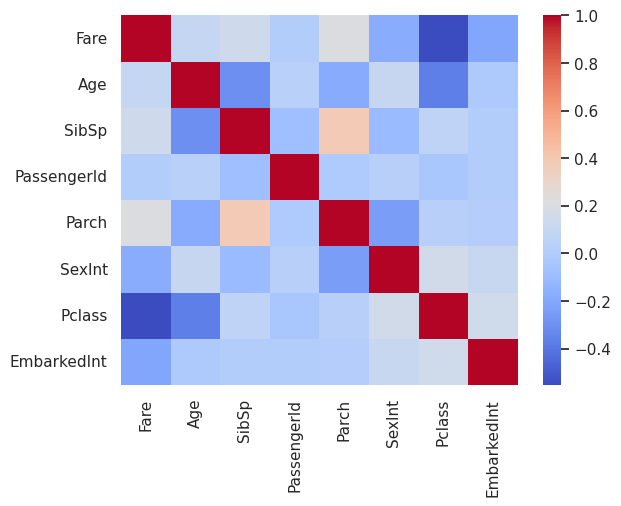

In [76]:
#df2_numeric.corr().sort_values('Fare', axis=0).sort_values('Fare', axis=1)
sns.heatmap(df2_numeric.corr().sort_values('EmbarkedInt', axis=0).sort_values('EmbarkedInt', axis=1) , cmap='coolwarm')

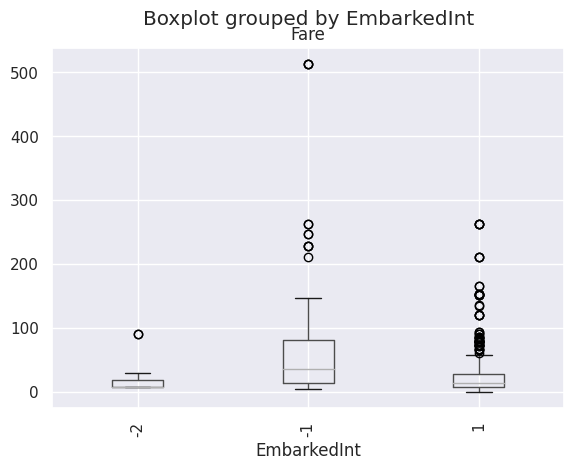

In [79]:
df2.boxplot('Fare', by='EmbarkedInt', rot=90)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))